In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import diff
from statsmodels.nonparametric.smoothers_lowess import lowess
import math

In [14]:
LR = {
    'Patrol' : {
        'Ratio' : np.array(pd.read_csv('Specilaized Turbo Levo_Shock Compression.txt', usecols=[2], delim_whitespace=' ')),
        'Position' : np.array(pd.read_csv('Specilaized Turbo Levo_Shock Compression.txt', usecols=[0], delim_whitespace=' ')),
        'Shock' : np.array(pd.read_csv('Specilaized Turbo Levo_Shock Compression.txt', usecols=[1], delim_whitespace=' '))
        },
    'Anthem' : {
        'Ratio': np.array([2.5,  2.4206, 2.362,  2.3, 2.27,   2.22,   2.16,   2.14,   2.121,  2.11]),
        'Position' : np.arange(0, 101, 10),
        },
    }


# LR2 = np.array(pd.read_csv('/content/Transition Patrol_leverage_ratio.txt', usecols=[1], delim_whitespace=' '))
# LR2 = LR2.reshape(-1)

In [101]:
bike = LR['Patrol']
position = bike['Position'].reshape(-1,)
shock = bike['Shock'].reshape(-1,)
ratio = 1/bike['Ratio'].reshape(-1,)
pro = int((((ratio[0]/ratio[-1])-1)*100)) #calculate progression from beginning to end
riderweight=72 #kg
bikeweight=25 #kg
weightbalance=0.6 #%of weight on rear wheel
rearweight = (riderweight + (bikeweight*0.8)) * weightbalance #rear sprung weight
travel = position[-1] #bike travel
stroke = 52.5 #shock[-1] #shock stroke

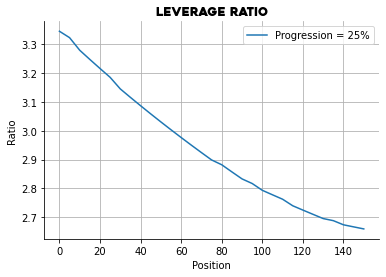

Progression = 25 %


In [102]:
plt.plot(position, ratio, label =f'Progression = {pro}%')
plt.title("Leverage Ratio", fontname='Heavitas')
plt.ylabel("Ratio")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
plt.legend()
#plt.savefig('.png')
plt.show()

print("Progression =", pro,"%")

In [126]:
spring = 550 #lb/in
mspring = spring * 0.175 #covert to N/mm
Force =[]

for x in shock:      #changes spring force to wheel force
    f = mspring * x
    Force.append(f)
wheel = Force / ratio

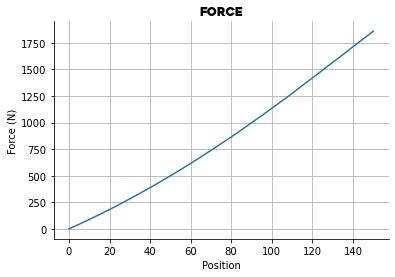

In [127]:
plt.plot(position, wheel)
plt.title("Force", fontname='Heavitas')
plt.ylabel("Force (N)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
#plt.legend()
#plt.savefig('.png')
plt.show()

In [128]:
n =  (rearweight*9.81) #weight on wheel in N
sag = np.round(np.interp(n, wheel, position),0)
sagpc = np.round((sag/travel)*100, 0)               
print(sag,"mm")
print(sagpc,"%")#sag at the wheel

54.0 mm
36.0 %


In [129]:
sagratio = np.round(np.interp(sag, position, ratio))
shocksag = sag/sagratio
shocksagpc = (shocksag/stroke)*100
print(shocksagpc)

34.285714285714285


In [130]:
g=np.round((wheel[-1]/9.81)/rearweight,1) #number of g's to bottom out
print(g,"g")

3.4 g


In [131]:
work=np.round(np.trapz(wheel, position/1000)) #trapezoidal integration to calculate work 
print(work,"J")

127.0 J


In [132]:
Rate = diff(wheel)/diff(position)
filtered = lowess(Rate, position[1:], frac=0.3, it=0)


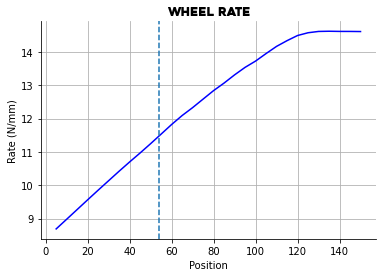

In [133]:
filteredrate = (filtered[:,1]).reshape(-1,)
filteredposition = (filtered[:,0]).reshape(-1,)
plt.plot(filteredposition, filteredrate, 'b')
plt.title("Wheel Rate", fontname='Heavitas')
plt.ylabel("Rate (N/mm)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axvline(x=sag, ls='--')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
#plt.ylim(10,14)
#plt.legend()
#plt.savefig('.png')
plt.show()

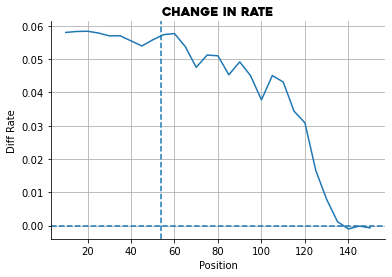

0.040851789769480513


In [142]:
ratechange = diff(filteredrate)/diff(filteredposition)
plt.plot(filteredposition[1:], ratechange)
plt.title("Change in Rate", fontname='Heavitas')
plt.ylabel("Diff Rate")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axhline(y=0, ls='--')
plt.axvline(x=sag, ls='--')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
#plt.legend()
#plt.savefig('.png')
plt.show()
print(np.mean(ratechange))

In [135]:
def natural_frequency(k, m) :
    Wo = math.sqrt(k/m)
    return Wo

In [136]:
freq = []
Fn = []
for x in filteredrate:
    b = natural_frequency((x*1000), rearweight)
    freq.append(b)
    Fn.append(b/6.28)
    
print(freq, Fn)
    

[12.545451659749553, 12.75318035996828, 12.95856421843251, 13.160990794564558, 13.35856505622432, 13.550380524841136, 13.73961697491801, 13.92127565094933, 14.095711895454821, 14.273850029054397, 14.454683831371343, 14.634251128877342, 14.799572553975995, 14.94432402250211, 15.098763943988551, 15.250965944464479, 15.384886068190992, 15.528975053947454, 15.659694397691, 15.768531717059842, 15.897438026441424, 16.01986554498003, 16.116729826847457, 16.203222966670968, 16.249390774465173, 16.271334612916405, 16.2745692423494, 16.27182530683487, 16.271439722768857, 16.2695516950383] [1.9976833853104383, 2.030761203816605, 2.063465639877788, 2.095699171109006, 2.127160040800051, 2.1577039052294804, 2.1878370979168804, 2.216763638686199, 2.2445401107412133, 2.2729060555819105, 2.301701247033653, 2.3302947657447994, 2.356619833435668, 2.3796694303347308, 2.40426177452047, 2.428497761857401, 2.4498226223234063, 2.4727667283355816, 2.49358191046035, 2.510912693799338, 2.53143917618494, 2.550934

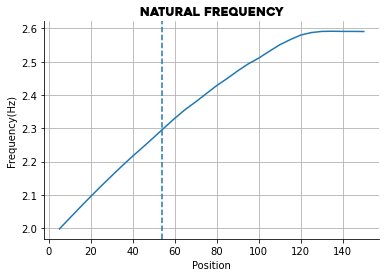

In [137]:
plt.plot(position[1:], Fn)
plt.title("Natural Frequency", fontname='Heavitas')
plt.ylabel("Frequency(Hz)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axvline(x=sag, ls='--')
plt.show()

In [138]:
dampingratio = 0.1 #LSR 0.45, HSR 0.3

def dampingrate(f, m, r):
    damping = 2 * r * f * m #natural freq in rad/s x weight x damping ratio
    return damping
    

In [139]:
damprate=[]
for f in freq:
    rate = dampingrate(f, rearweight, dampingratio)
    damprate.append(rate)
    
print(damprate) # in N/m/s

[138.50178632363506, 140.79511117404982, 143.06254897149492, 145.29733837199274, 147.47855822071648, 149.59620099424615, 151.68537140309482, 153.6908831864806, 155.61665932582122, 157.58330432076053, 159.57970949833964, 161.56213246280583, 163.387280995895, 164.9853372084233, 166.6903539416336, 168.37066402688785, 169.84914219282854, 171.43988459557988, 172.88302615050864, 174.08459015634065, 175.50771581191333, 176.85931561657952, 177.9286972883959, 178.88358155204747, 179.3932741500955, 179.63553412659712, 179.67124443553737, 179.64095138745697, 179.6366945393682, 179.6158507132228]


In [140]:
shockdampingrate = damprate*(ratio[1:]**2) #N/m/s

In [141]:
print(shockdampingrate)

[1528.70041527 1513.51906664 1508.08050442 1502.23155646 1495.78642359
 1479.33429249 1472.08753218 1464.05733869 1455.32698637 1447.04595336
 1439.09413466 1431.07047604 1421.73563575 1410.56510728 1400.46506147
 1398.32291628 1386.52360974 1375.82265001 1371.81532355 1358.29554443
 1354.22620225 1349.61780483 1335.55036433 1328.12316932 1317.50849472
 1305.10192549 1298.35273179 1284.28716426 1277.4164945  1270.48332612]
